> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# I: Linear Regression

<div style="text-align: right"> **Due date: Sep. 21, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM in the form of [ID_Name_HW1.ipynb].** </div> 
<div style="text-align: right"> Beomjun Kim(김범준): <a href="mailto:beomjun.kim@yonsei.ac.kr">beomjun.kim@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Chanho Um(엄찬호): <a href="mailto:chanho0103@yonsei.ac.kr">chanho0103@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[2016142072] [Nam Gil Hyun]</span> </h2>

In [9]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2018-09-11 12:44:45.391211


## Problem description

Let's estimate an exam score for machine intelligence given two other ones for circuits and data structures. Scores for 1,000 students are available ($\texttt{exam_scores.csv}$). You can use $\texttt{linalg.inv}$, transpose, dot operators provided by $\texttt{Numpy}$ when writing codes.

**I. Score distributions**   
(*5 points*) P1.1 Draw a scatter plot for score distributions (X axis: scores for circuits, Y axis: scores for data structures, Z axis: scores for machine intelligence). You can use '$\texttt{scatter}$' from $\texttt{matplotlib.pyplot}$, and '$\texttt{Axes3D}$' from $\texttt{mpl_toolkits.mplot3d}$. 

**II. Linear regression using gradient descent**   
(*40 points*) P2.1 Implement a linear regression method using **gradient descent** and estimate regression coefficients $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively. 

> a. Learning rate = 0.0001   
> b. Number of iterations = 1,000,000    
> c. Loss function = average RSS (i.e., (1/N)*RSS where N(=1,000) is a total number of samples)   
> d. Initialize all weight values to 0.

(*10 points*) P2.2 Plot an average RSS over number of iterations.  
(*10 points*) P2.3 Draw a plane using estimated regression coefficients ($w_0$, $w_1$, $w_2$). You can use $\texttt{plot_wireframe}$ and $\texttt{meshgrid}$. 

**III. Linear regression without iterations**      
(*30 points*) P3.1 Implement a linear regression method without iterations (**closed form soultion**) and estimate weights $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively.   
(*5 points*) P3.2 Draw a plane using estimated regression coefficients and compare it with your plot in P2.3.

**P1. Score distributions**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Read csv format data
df = pd.read_csv('exam_scores.csv')
df.head()


,Circuit,DataStructure,MachineIntelligence
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [97]:
# Plot statistical Infomation.
df.describe()

,Circuit,DataStructure,MachineIntelligence
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


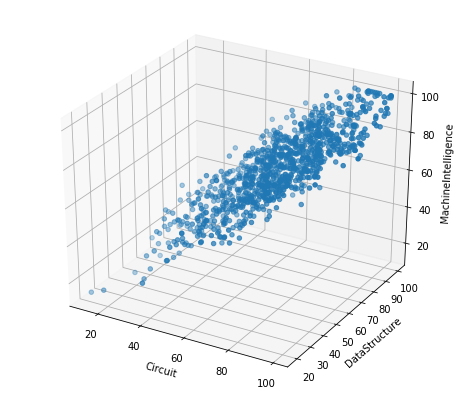

In [117]:

# Plot the graph
gr=plt.figure(figsize=(8,7)).gca(projection='3d')
gr.scatter(df['Circuit'],df['DataStructure'],df['MachineIntelligence'])             
               
gr.set_xlabel('Circuit')
gr.set_ylabel('DataStructure')
gr.set_zlabel('MachineIntelligence')

plt.show()

**Discussion**

csv데이터를 읽어와 조작하기 쉽게 Pandas의 Dataframe 객체로 가져왔다. 
gca를 사용해 x축은 Circuit Score, y축은 DataStructure Score, z축은 MachineIntelligence Score로 설정하여 3차원 그래프를 그렸다. 3가지 데이터를 scatter함수를 통해 plot하였다. 대체적으로 한 과목의 점수가 높은 학생들은 다른 과목에서도 높은 편이고, 한 과목에서 낮은 점수를 받은 학생들은 다른 과목에서도 낮은 점수를 받는 편임을 확인할 수 있다. 또한 각 점들이 모인 모양은 특정한 우상향 평면과 유사한 경향을 보임을 육안으로 확인할 수 있었다.

**P2.1 Linear regression using gradient descent**

In [98]:
C = df['Circuit'].values
D = df['DataStructure'].values
M = df['MachineIntelligence'].values

# The number of data points
m = len(C)

x0 = np.ones(m)
X = np.array([x0, C, D]).T

# Initial coefficients
W = np.array([0, 0, 0]) # Initialize all weight values to 0
Y = np.array(M)
alpha = 0.0001

# We use average RSS function as a cost function
def cost_function(X, Y, W):
    m = len(Y)
    J = np.sum((X.dot(W) - Y) ** 2)/m # Implement average RSS function by using vector inner product
    return J

initial_cost = cost_function(X, Y, W)
print('inital cost: {0}'.format(initial_cost))

# Set gradient descent function which returns W, cost_history
def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for i in range(iterations):
        # Hypothesis Values
        h = X.dot(W)
        # Difference between Hypothesis values and Y
        loss = h - Y
        # Calculate Gradient
        gradient = 2*X.T.dot(loss) / m
        # Renweing Values of W 
        W = W - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, W)
        cost_history[i] = cost
        
    return W, cost_history

# After 1000000 Iterations, W & cost_history
newW, cost_history = gradient_descent(X, Y, W, alpha, 1000000)

# Final Values of W
print('estimated regression coefficients(W0,W1,W2):{0},{1},{2}'.format(newW[0],newW[1],newW[2]))

# Final Cost of new W
print('Final cost of new W : {0}'.format(cost_history[-1]))

inital cost: 4940.22
estimated regression coefficients(W0,W1,W2):-1.461968981204591,0.09600000726848561,0.910495582642976
Final cost of new W : 20.91129599768761


In [99]:
print(cost_history[0])

4573.777183534125


**Discussion**

우리의 목표는 경사하강법을 통해 비용함수를 최소로 하는 가중치값을 찾는 것이다.
문제에 주어진 조건에 따라 cost funtion과 gradient descent함수를 만들어서 최소의 비용과 그때의 가중치값을 계산하였다.
비용함수로는 average RSS 함수를 사용하였으며 이는 아래와 같다.

\\(Average RSS(w)=\frac { 1 }{ N } \overset { N }{ \underset { i=1 }{ \Sigma  }  } { ({ y }_{ i }-{ h }^{ T }({ x }_{ i })w) }^{ 2 }\\) 

\\(=\frac { 1 }{ N }{ (y-Hw) }^{ T }(y-Hw)\\)

(N: # of data points)

여기서 (y-Hw)는 N차원의 벡터이다.
데이터의 개수가 많으므로 효과적으로 cost function이나 gradient descent과정을 계산하기 위해 넘파이의 어레이를 활용하였다.
현재 dataframe형태로 저장된 세 과목의 성적에 대한 데이터들을 .values 함수를 통해 어레이 형태로 변환하였다. gradient descent함수를 구현할 때에는 반복문을 활용해 반복시마다 W값과 cost값을 갱신하도록 하였다.
가중치 w를 갱신하는 식은 다음과 같다. 

\\({ w }_{ j }={ w }_{ j }-\alpha \frac { \partial  }{ \partial { w }_{ j } } J( w )\\)

미분한 결과를 대입하면 아래와 같다.

\\({ w }_{ j }={ w }_{ j }-\alpha \frac { 2 }{ N } \sum _{ i=1 }^{ N }{ ({ h }_{ w }({ x }^{ (i) })-{ y }^{ (i) }){ x }_{ j }^{ (i) } } \\)

여기서 J(w)는 cost function을 의미하고 alpha는 학습률 즉 learning rate를 의미한다. 이는 step size를 결정한다. 위의 식을 array연산으로 위의 코드에 구현하였다.  학습률이 너무 크면 최솟값을 잘 찾지 못하고 학습률이 너무 작으면 시간과 계산량이 너무 많아지는 문제점이 있어 적당한 학습률이 중요하다. 본 문제에서는 적당한 학습률이 주어져 있다.

 1000000번 반복할 때마다 갱신된 비용 함수의 값을 cost_history 어레이에 저장하는데, 이를 통해 처음 cost값(4940.22)에 비해 최종 cost값(20.9)이 상당히 감소하였음을 확인할 수 있다. 

**P2.2 Plot an average RSS over number of iterations.**

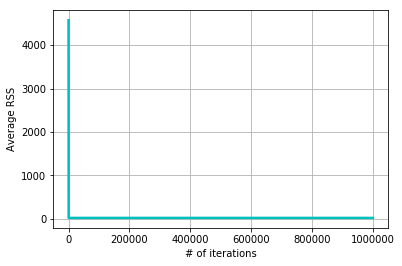

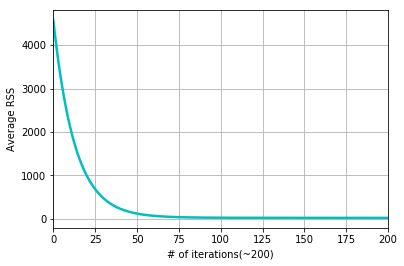

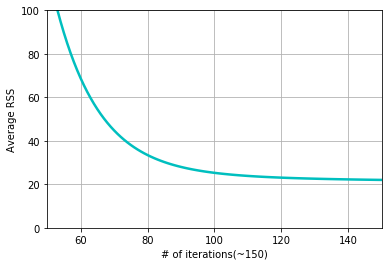

In [105]:
# Make Data.
x = range(0,1000000)
y = [cost_history[v] for v in x]

# Plot the graph
plt.plot(x,y,'c-',lw=2.5)
plt.xlabel('# of iterations')
plt.ylabel('Average RSS')
plt.grid(True)
plt.show()

# Make Data.
y = [cost_history[v] for v in x]
plt.xlim(0,200)
plt.plot(x,y,'c-',lw=2.5)

# Plot the graph
plt.xlabel('# of iterations(~200)')
plt.ylabel('Average RSS')
plt.grid(True)
plt.show()

# Make Data.
y = [cost_history[v] for v in x]
plt.xlim(50,150)
plt.ylim(0,100)
plt.plot(x,y,'c-',lw=2.5)

# Plot the graph
plt.xlabel('# of iterations(~150)')
plt.ylabel('Average RSS')
plt.grid(True)
plt.show()


**Discussion**

cost_history에 저장된 iteration에 따른 Average RSS 값을 plot함수를 사용해 나타내 보았다.
반복횟수가 1부터 1000000까지 그래프를 그려보니 0부근에서 엄청 감소하고 끝까지 별로 차이가 없다는 것밖에 알 수 없었다.
따라서 Average RSS값의 반복횟수에따른 경향을 살펴보기 위해 x축의 값을 200으로 제한해서 그리고 정확한 수치를 확인하기 위해 x,y축 범위를 제한하고 그래프 선의 굵기를 비교적 두껍게 해서  그려보았다.
그래프를 살펴보면 Average RSS값이 계속 감소하며 반복횟수가 100번 정도부터 cost값이 약 20 정도로 거의 일정하게 유지되는 것을 확인 할 수 있다. 
결과적으로 cost값이 4573 정도에서 20 정도로 유의미하게 감소되었음을 확인할 수 있었다. 또한 반복횟수가 적을 때 감소하는 양이 많았고 반복할수록 감소하는 양이 적음을 확인할 수 있었다.  이론으로 알고 있는 대로 계속 감소하며 근사하게 최솟값(closed form solution으로 구한 값)에 수렴함을 확인 할 수 있었다.
learning rate alpha값이나 가중치 w 의 initial condition에 따라 조금씩 경향이 달라질 수는 있겠지만 문제 상황은 고정되있기 때문에 이 정도로 살펴보도록 하겠다.



**P2.3 Draw a plane using estimated regression coefficients ( w0 ,  w1 ,  w2 ). You can use  𝚙𝚕𝚘𝚝⎯𝚠𝚒𝚛𝚎𝚏𝚛𝚊𝚖𝚎  and  𝚖𝚎𝚜𝚑𝚐𝚛𝚒𝚍 .**

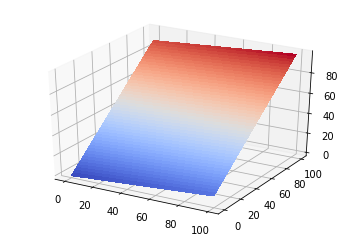

In [78]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X1 = np.arange(0, 100, 0.25)
Y1 = np.arange(0, 100, 0.25)
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = newW[0]+newW[1]*X1+newW[2]*Y1

# Plot the surface.
surf = ax.plot_surface(X1, Y1, Z1,cmap='coolwarm',linewidth=0,antialiased=False)


**Discussion**

meshgrid 함수를 사용하여 P2.1에서 경사하강법을 통해 구한 가중치 newW[0], newW[1], newW[2] 가 parameter인 평면을 그려보았다.
P2.1에서 구한 가중치들로 z=w0+w1x+w2y 의 평면을 meshgrid를 통해 plot 해본 결과 P1의 점수 분포도를 어느 정도 포함하는 듯한 유사도를 육안으로 확인할 수 있다.

**P3.1 Implement a linear regression method without iterations (closed form soultion) and estimate weights  w0 ,  w1 ,  w2  for a bias, a circuit score, and a data structure score, respectively.**

In [88]:
import numpy.linalg as npl
print(X.shape,Y.shape)

# Calculate Closed Form Solution
w=np.dot(np.dot(npl.inv(np.dot(X.T,X)),X.T),Y)
print('weight for Bias: {0}, weight for Circuit Score: {1}, weight for Data Structure Score: {2} '.format(w[0],w[1],w[2]))


(1000, 3) (1000,)
weight for Bias: -1.4624373849416519, weight for Circuit Score: 0.09600221211313552, weight for Data Structure Score: 0.9104998931166782 


**Discussion**

RSS 함수는 quadratic function이므로 아래로 볼록한 개형임을 알 수 있다. 따라서 RSS의 Gradient를 0으로 하는 가중치 w들을 찾을 수 있다. (우리는 average RSS function을 쓰지만 이는 RSS함수에 갯수를 나눈 것이므로 그대로 적용 가능하다)이와 같은 방법으로 구하는 것을 closed form solution 혹은 normal equation이라고 한다. closed form solution은 다음과 같다.

\\(\hat { w } ={ ({ H }^{ T }H) }^{ -1 }{ H }^{ T }y\\)

이 solution에는 feature extractor H의 인버스와 H를 곱한 행렬의 인버스가 들어가는데 이 인버스는 H의 차원이 N*(D+1)이라고 할 때, N>D+1인 경우에만 구할수 있다(invertible condition). 이 위의 코드와 그 결과에서 H에 해당하는 X의 shape이 (1000,3)이어서 N=1000, D+1=3 이므로 조건을 만족함을 확인 할 수 있다. 따라서 numpy의 linear algebra (linalg) 모듈에 있는 inv 함수를 활용해 closed form solution을 구현하여 w를 구할 수 있다. 
구해진 w0, w1, w2를 P2.1의 Gradient Descent를 통해 구한 값과 비교하면 거의 같음을 확인할 수 있다. 
이론과 같이 Gradient Descent를 통해 참값과 거의 근사한 값을 구할 수 있는 것을 확인했다.
closed form solution은 data point나 feature의 수가 많아짐에 따라 계산량이 엄청 커져서 항상 최적의 방법이라고는 할 수 없지만 이 경우에서는 큰 시간 소요 없이 답이 구해짐을 확인하였다. 
Inverse 의 complexity를 시간복잡도로 표현하면 \\(O({ D }^{ 3 })\\) 이다.

**P3.2 Draw a plane using estimated regression coefficients and compare it with your plot in P2.3.**

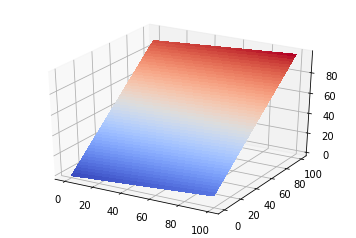

In [83]:
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

# Make data.
X2 = np.arange(0, 100, 0.25)
Y2 = np.arange(0, 100, 0.25)
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = w[0]+w[1]*X2+w[2]*Y2

# Plot the surface.
surf1 = ax1.plot_surface(X2, Y2, Z2,cmap='coolwarm',linewidth=0,antialiased=False)


**Discussion**

P2.3의 코드와 같은 방식으로 plot 해주고 가중치 값만 w[0], w[1], w[2]로 바꿔준다.
결과를 살펴보면 P2.3에 나타난 평면과 거의 비슷함을 알 수 있다. (가중치 값이 거의 같기 때문에 당연하다.)
